# Turunan Symbolic

In [ ]:
import sympy as sy

In [ ]:
x = sy.Symbol('x')

f = 2*x**2+4*x-1

In [ ]:
f

2*x**2 + 4*x - 1

In [ ]:
#First order
df = f.diff()
df

4*x + 4

In [ ]:
#Second order
df.diff()

4

In [ ]:
#Third order
df.diff().diff()

0

# Numerik

In [ ]:
import numpy as np

In [ ]:
X = np.linspace(-20,20)
Y = 2*X**2+4*X-1

In [ ]:
X

array([-20.        , -19.18367347, -18.36734694, -17.55102041,
       -16.73469388, -15.91836735, -15.10204082, -14.28571429,
       -13.46938776, -12.65306122, -11.83673469, -11.02040816,
       -10.20408163,  -9.3877551 ,  -8.57142857,  -7.75510204,
        -6.93877551,  -6.12244898,  -5.30612245,  -4.48979592,
        -3.67346939,  -2.85714286,  -2.04081633,  -1.2244898 ,
        -0.40816327,   0.40816327,   1.2244898 ,   2.04081633,
         2.85714286,   3.67346939,   4.48979592,   5.30612245,
         6.12244898,   6.93877551,   7.75510204,   8.57142857,
         9.3877551 ,  10.20408163,  11.02040816,  11.83673469,
        12.65306122,  13.46938776,  14.28571429,  15.10204082,
        15.91836735,  16.73469388,  17.55102041,  18.36734694,
        19.18367347,  20.        ])

In [ ]:
Y

array([ 7.19000000e+02,  6.58291962e+02,  6.00249479e+02,  5.44872553e+02,
        4.92161183e+02,  4.42115369e+02,  3.94735110e+02,  3.50020408e+02,
        3.07971262e+02,  2.68587672e+02,  2.31869638e+02,  1.97817160e+02,
        1.66430237e+02,  1.37708871e+02,  1.11653061e+02,  8.82628072e+01,
        6.75381091e+01,  4.94789671e+01,  3.40853811e+01,  2.13573511e+01,
        1.12948771e+01,  3.89795918e+00, -8.33402749e-01, -2.89920866e+00,
       -2.29945856e+00,  9.65847564e-01,  6.89670970e+00,  1.54931279e+01,
        2.67551020e+01,  4.06826322e+01,  5.72757185e+01,  7.65343607e+01,
        9.84585589e+01,  1.23048313e+02,  1.50303623e+02,  1.80224490e+02,
        2.12810912e+02,  2.48062890e+02,  2.85980425e+02,  3.26563515e+02,
        3.69812162e+02,  4.15726364e+02,  4.64306122e+02,  5.15551437e+02,
        5.69462307e+02,  6.26038734e+02,  6.85280716e+02,  7.47188255e+02,
        8.11761349e+02,  8.79000000e+02])

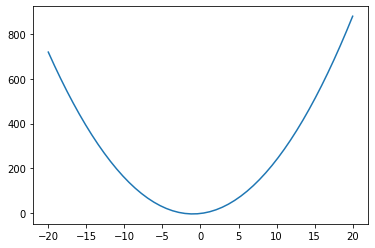

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X,Y)

In [ ]:
df1 = np.diff(Y)/np.diff(X)
df2 = np.gradient(Y,X)

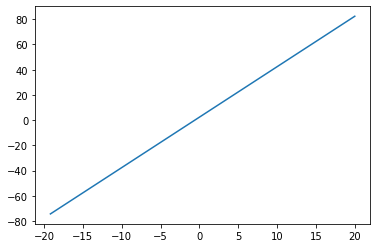

In [ ]:
plt.plot(X[1:],df1)

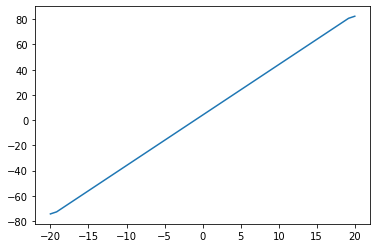

In [ ]:
plt.plot(X,df2)

### Optimisasi

In [ ]:
from scipy.optimize import minimize_scalar

def f(x):
  return 2*x**2+4*x-1

opt=minimize_scalar(f)
opt

     fun: -3.0
    nfev: 9
     nit: 4
 success: True
       x: -1.0000000000000002

In [ ]:
def f3(x):
  return -(x**3 - 6*x**2 + 9*x + 1)

minimize_scalar(f3)

     fun: -5.0
    nfev: 13
     nit: 9
 success: True
       x: 0.99999998519

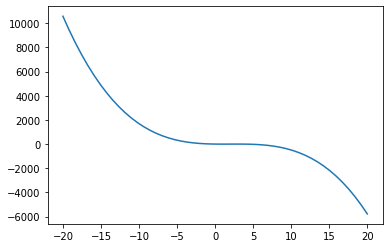

In [ ]:
Y3 = X**3 - 6*X**2 + 9*X + 1
plt.plot(X,-Y3)

## Turunan Parsial

In [ ]:
x,y,z = sy.symbols('x y z')
f = 4*x*y + x*sy.sin(z) + x**3 + z**8*y
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [ ]:
#Turunan parsial terhadap x
sy.diff(f,x)

3*x**2 + 4*y + sin(z)

In [ ]:
#Turunan parsial terhadap y
sy.diff(f,y)

4*x + z**8

In [ ]:
f.diff(z)

x*cos(z) + 8*y*z**7

### Gradien

In [ ]:
from sympy.tensor.array import derive_by_array
grad = derive_by_array(f, (x,y,z))
grad

[3*x**2 + 4*y + sin(z), 4*x + z**8, x*cos(z) + 8*y*z**7]

### Jacobian

In [ ]:
f_jacob =sy.Matrix([x**y+y, 2*x*y-2])
f_jacob

Matrix([
[ x**y + y],
[2*x*y - 2]])

In [ ]:
par = sy.Matrix([x,y])
f_jacob.jacobian(par)

Matrix([
[x**y*y/x, x**y*log(x) + 1],
[     2*y,             2*x]])

In [ ]:
sy.Matrix(grad).jacobian(sy.Matrix([x,y,z]))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

### Hessian

In [ ]:
sy.hessian(f,(x,y,z))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

## Turunan Parsial Numerik

In [ ]:
import numpy as np
def f(x,y): 
  return x**2*y+2*x**3*y+y**4

x=np.linspace(1,10)
y=np.linspace(1,10)

z=np.array( [[f(i,j) for i in x] for j in y] )

dx,dy = np.gradient(z)

In [ ]:
dx

array([[   1.51405365,    1.82959221,    2.2455377 , ...,  346.33846043,
         366.13673811,  386.67731896],
       [   1.79879288,    2.11433144,    2.53027693, ...,  346.62319966,
         366.42147734,  386.96205819],
       [   2.46311416,    2.77865272,    3.19459822, ...,  347.28752094,
         367.08579863,  387.62637947],
       ...,
       [ 657.45523618,  657.77077474,  658.18672024, ..., 1002.27964296,
        1022.07792064, 1042.61850149],
       [ 695.74408466,  696.05962322,  696.47556871, ..., 1040.56849144,
        1060.36676912, 1080.90734997],
       [ 715.25004974,  715.5655883 ,  715.98153379, ..., 1060.07445652,
        1079.8727342 , 1100.41331505]])

In [ ]:
dy

array([[   1.71793215,    1.99126214,    2.57510051, ...,  105.80708718,
         109.81133711,  111.83205127],
       [   2.03347071,    2.35700417,    3.04807816, ...,  125.24104197,
         129.98076638,  132.37263212],
       [   2.34900927,    2.7227462 ,    3.5210558 , ...,  144.67499676,
         150.15019564,  152.91321296],
       ...,
       [  16.54824442,   19.18113739,   24.80504982, ..., 1019.20296225,
        1057.7745126 , 1077.23935102],
       [  16.86378298,   19.54687942,   25.27802746, ..., 1038.63691704,
        1077.94394186, 1097.77993187],
       [  17.17932154,   19.91262144,   25.75100511, ..., 1058.07087183,
        1098.11337113, 1118.32051271]])

Text(0.5, 1.0, 'dy')

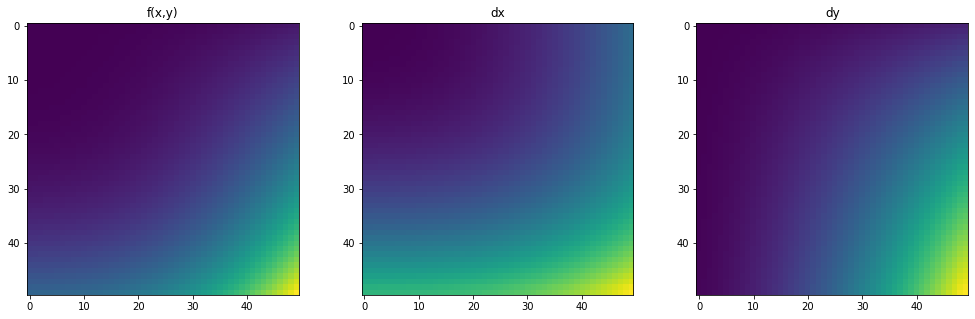

In [ ]:
#Plot z,dx,dy yang dianggap sebagai sebuah gambar

fig, ax = plt.subplots(ncols=3,figsize=(17,5))
ax[0].imshow(z)
ax[0].set_title('f(x,y)')
ax[1].imshow(dx)
ax[1].set_title('dx')
ax[2].imshow(dy)
ax[2].set_title('dy')

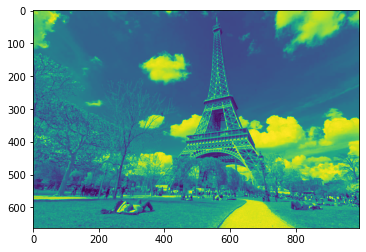

In [ ]:
gambar = plt.imread('2-4.jpg')
plt.imshow(gambar[:,:,0])

Text(0.5, 1.0, 'dy')

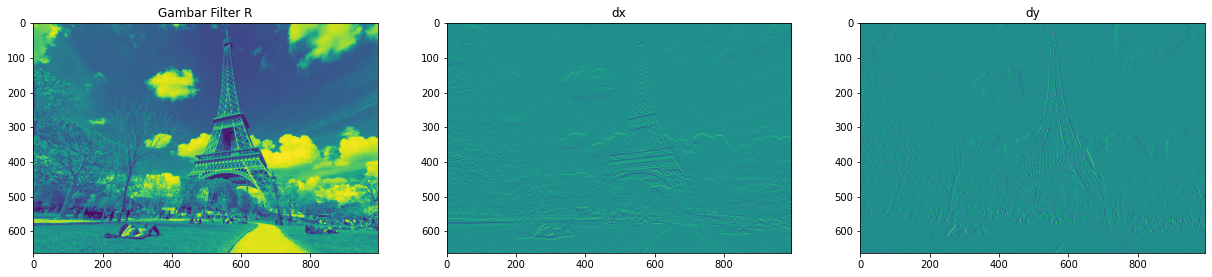

In [ ]:
R = gambar[:,:,0]
R_dx,R_dy = np.gradient(R)

fig, ax = plt.subplots(ncols=3,figsize=(21,5))
ax[0].imshow(R)
ax[0].set_title('Gambar Filter R')
ax[1].imshow(R_dx)
ax[1].set_title('dx')
ax[2].imshow(R_dy)
ax[2].set_title('dy')

# Integral

### Symbol

In [ ]:
x = sy.Symbol('x')
f = 2*x**2+4*x-1
f

2*x**2 + 4*x - 1

In [ ]:
sy.integrate(f)

2*x**3/3 + 2*x**2 - x

### Numeric - Fungsi

In [ ]:
from scipy import integrate

def f(x):
  return 2*x**2+4*x-1
  
A = integrate.quad(f,2,5)
print(A)

(117.0, 1.2989609388114332e-12)


### Numeric - Data/Array

In [ ]:
from scipy import integrate
import numpy as np

def f(x):
  return 2*x**2+4*x-1

x = np.linspace(2,5)
y = f(x)

A = integrate.trapz(y,x)
A

117.00374843815077

In [ ]:
#Case Menghitung Total Pendapatan tahun 2019 di Supermarket Cabang Yangon
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/ds-masterclass-h8-vol2/main/data/supermarket_sales%20-%20Sheet1.csv')
data = data[data['City']=='Yangon'].sort_values(['Date','Time']).reset_index(drop=True)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
2,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
3,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
4,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,1/1/2019,20:26,Ewallet,108.16,4.761905,5.408,6.9


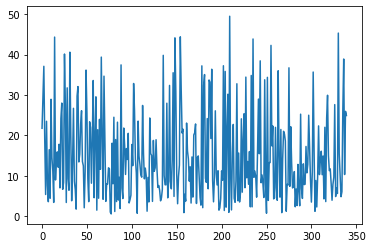

In [ ]:
data['gross income'].plot(kind='line')

In [ ]:
x = data.index
y = data['gross income']

total_gross_income_2019 = integrate.trapz(y,x)
print('Total Gross Income in 2019:',total_gross_income_2019)

Total Gross Income in 2019: 5033.7964999999995


In [ ]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               340 non-null    object        
 1   Branch                   340 non-null    object        
 2   City                     340 non-null    object        
 3   Customer type            340 non-null    object        
 4   Gender                   340 non-null    object        
 5   Product line             340 non-null    object        
 6   Unit price               340 non-null    float64       
 7   Quantity                 340 non-null    int64         
 8   Tax 5%                   340 non-null    float64       
 9   Total                    340 non-null    float64       
 10  Date                     340 non-null    datetime64[ns]
 11  Time                     340 non-null    object        
 12  Payment                  340 non-nul

In [ ]:
data['Month'] = data['Date'].dt.month

In [ ]:
data_bulanan = data.groupby('Month').sum()
data_bulanan

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,6349.53,685,1841.9585,38681.1285,36839.17,566.666667,1841.9585,842.3
2,5430.93,493,1421.9105,29860.1205,28438.21,447.619048,1421.9105,658.7
3,6845.03,681,1793.2915,37659.1215,35865.83,604.761905,1793.2915,888.2


In [ ]:
x = data_bulanan.index
y = data_bulanan['gross income']

total = integrate.trapz(y,x)
print('Total Gross Income on Jan - Mar:',total)

Total Gross Income on Jan - Mar: 3239.5355


In [ ]:
data_bulanan['gross income'].sum()

5057.1605

## Luas area lingkaran

In [ ]:
from scipy.integrate import trapz
import numpy as np

R=30
x=np.linspace(-R,R)

upper = np.sqrt(R**2 - x**2)
lower = -upper

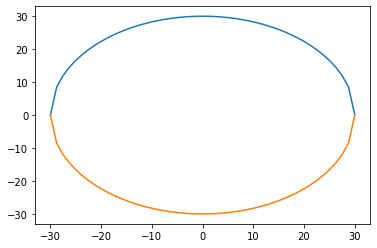

In [ ]:
plt.plot(x,upper)
plt.plot(x,lower)

In [ ]:
area = trapz(upper,x) - trapz(lower,x) 

print(area)

2818.716702242422
